In [1]:
import re 
import pickle


import pandas as pd
import numpy as np
import json

import pprint
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict


from wordcloud import WordCloud


import gensim 
from gensim import corpora

--------------

In [5]:
with open('data/yelp-dataset/review_df.pickle','rb') as fp:
    df_review = pickle.load(fp)

---------

# 分析 rating stars/cool/funny

first drop ['text']  for speed

In [72]:
df_rating = df_review.drop(labels=['text'],axis=1)
print(df_rating['stars'].unique())
df_rating.head()

[2 5 1 4 3]


,business_id,cool,date,funny,review_id,stars,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,0,msQe1u7Z_XuqjGoqhB0J5g


In [7]:
df_rating.describe()

,cool,funny,stars,useful
count,2.287009e+06,2.287009e+06,2.287009e+06,2.287009e+06
mean,6.623887e-01,5.374430e-01,3.781735e+00,1.352551e+00
std,2.517899e+00,2.159522e+00,1.389171e+00,3.416554e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,3.110000e+02,3.940000e+02,5.000000e+00,3.130000e+02


AxesSubplot(0.547727,0.125;0.352273x0.343182)
AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


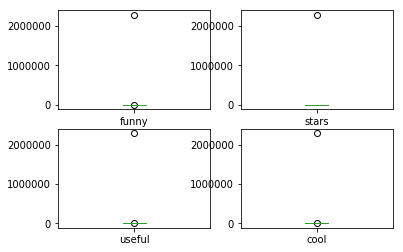

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(1,5):
    axis_ = axes[int(i/2)-1, i%2]
    print(axis_)
#     ax = axes[0,0]
#     ax
    df_rating.describe().iloc[:,i-1].plot(kind='box',ax=axis_)

groupby business id

In [9]:
grouped_avg_stars_rating = df_rating.groupby('business_id').mean()
# grouped_avg_stars_rating.rename('star',inplace=True)
grouped_avg_stars_rating.sort_values(by='stars', ascending=False, inplace=True)

In [10]:
grouped_avg_stars_rating['interval'] = pd.cut(grouped_avg_stars_rating['stars'],bins=5)
grouped_avg_stars_rating.head()

,cool,funny,stars,useful,interval
business_id,,,,,
JINLpOx5sB7eDtnAoy2UEg,0.062500,0.000000,5.0,0.250000,"(4.2, 5.0]"
HjaSykYIB3o5p3GMVPUasA,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
_Syl0eHkPuoYmBwz1e1Nsw,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
SORm6UKRlwHC6SmJZnbFEw,0.214286,0.142857,5.0,0.142857,"(4.2, 5.0]"
rnJP3FuuCBoo-wFxKPXYdQ,0.200000,1.000000,5.0,0.800000,"(4.2, 5.0]"


------------------

descriptive info on all business of Yelp

In [11]:
describe_rating = grouped_avg_stars_rating.describe()
describe_rating

,cool,funny,stars,useful
count,38117.000000,38117.000000,38117.000000,38117.000000
mean,0.613617,0.493615,3.772114,1.563563
std,0.959897,0.798628,0.885887,1.839058
min,0.000000,0.000000,1.000000,0.000000
25%,0.172414,0.100000,3.235294,0.666667
50%,0.400000,0.319820,3.860465,1.126984
75%,0.769231,0.620690,4.450980,1.875000
max,45.250000,34.500000,5.000000,62.500000


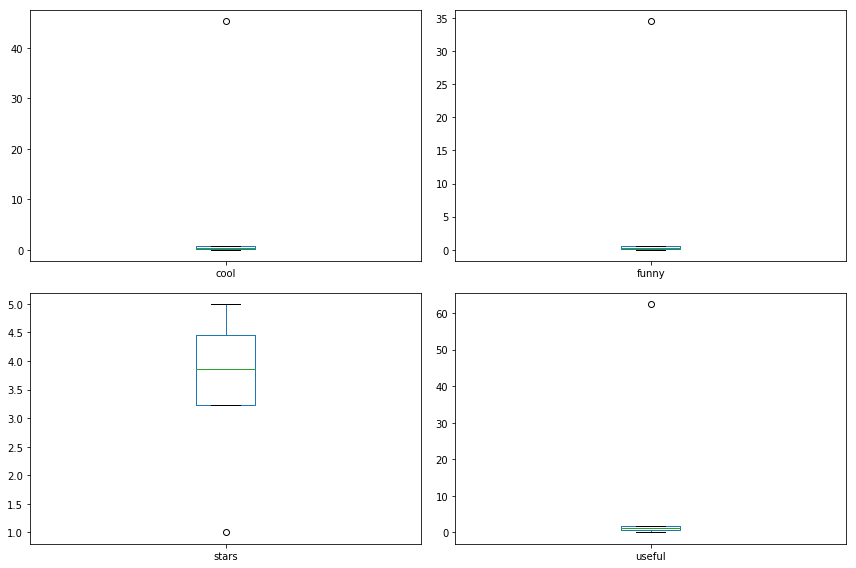

In [12]:
COL_NUM= 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,8))
for i in range(4):
    
    ax = axes[int(i/COL_NUM), i%COL_NUM]
#     pickup_zone = pickup_zone.sort_values(ascending=False)[:5] 
    describe_rating.loc['min':'max'].iloc[:,i].plot(kind='box', ax=ax)
#     ax.set_title(col)
    
plt.tight_layout() 

In [13]:
grouped_avg_stars_rating.head()

,cool,funny,stars,useful,interval
business_id,,,,,
JINLpOx5sB7eDtnAoy2UEg,0.062500,0.000000,5.0,0.250000,"(4.2, 5.0]"
HjaSykYIB3o5p3GMVPUasA,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
_Syl0eHkPuoYmBwz1e1Nsw,0.000000,0.000000,5.0,0.000000,"(4.2, 5.0]"
SORm6UKRlwHC6SmJZnbFEw,0.214286,0.142857,5.0,0.142857,"(4.2, 5.0]"
rnJP3FuuCBoo-wFxKPXYdQ,0.200000,1.000000,5.0,0.800000,"(4.2, 5.0]"


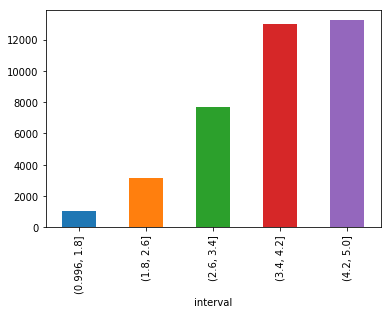

In [14]:
grouped_avg_stars_rating.groupby('interval').count()['stars'].plot(kind='bar')

In [15]:
grouped_stars = df_rating.groupby(['business_id','stars'])['user_id'].count()
grouped_stars.head()

business_id             stars
--9e1ONYQuAa-CB_Rrw7Tw  1         51
                        2        137
                        3        176
                        4        420
                        5        762
Name: user_id, dtype: int64

# 分析 user review 的freq， 尝试create 一个 uniform dist

In [16]:
df_rating['user_id'].describe()

count                    2287009
unique                    699323
top       bLbSNkLggFnqwNNzzq-Ijw
freq                        1787
Name: user_id, dtype: object

In [17]:
Freq_user_id = df_rating['user_id'].value_counts()
Freq_user_id.head()

bLbSNkLggFnqwNNzzq-Ijw    1787
CxDOIDnH8gp9KXzpBHJYXw    1299
PKEzKWv_FktMm2mGPjwd0Q    1277
UYcmGbelzRa0Q6JqzLoguw     882
n86B7IkbU20AkxlFX_5aew     779
Name: user_id, dtype: int64

In [18]:
Freq_user_id.iloc[:1070].sum()
    

187867

In [19]:
Freq_user_id[Freq_user_id==1].count()

399399

In [20]:
Freq_user_id[Freq_user_id<=5].count()

622320

In [21]:
Freq_user_id[Freq_user_id>=10].count()

38589

In [22]:
Freq_user_id = df_rating['user_id'].value_counts()

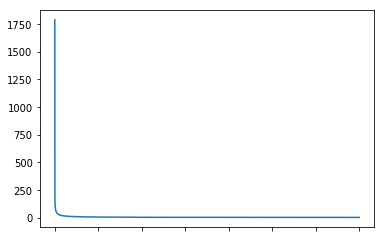

In [62]:
fig = plt.plot(figsize=(15,13))
Freq_user_id.iloc[:].plot(kind='line')
plt.show()

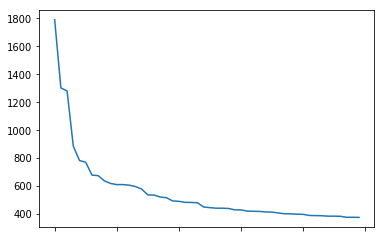

In [65]:
fig = plt.plot(figsize=(15,13))
Freq_user_id.iloc[:50].plot(kind='line')
plt.show()

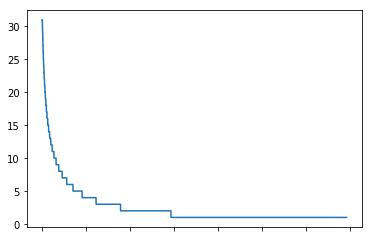

In [66]:
fig = plt.plot(figsize=(15,13))
Freq_user_id.iloc[7050:].plot(kind='line')
plt.show()

,index,user_id
interval,,
"(0, 1]",399399,399399
"(1, 5]",222921,222921
"(5, 10]",43282,43282
"(10, 100]",32667,32667
"(100, 1800]",1054,1054


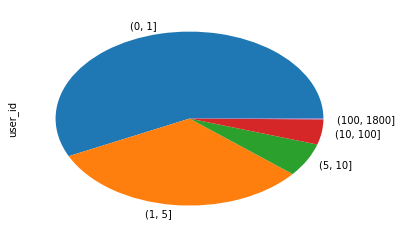

In [24]:
Freq_user_id_plot = Freq_user_id.reset_index()
Freq_user_id_plot['interval'] = pd.cut(Freq_user_id_plot['user_id'],[0,1,5,10,100,1800])
# Freq_user_id_plot.groupby('interval')['user_id'].count().plot(kind='bar')
Freq_user_id_plot.groupby('interval')['user_id'].count().plot(kind='pie')
Freq_user_id_plot.groupby('interval').count()

,user_id
interval,
"(0, 1]",399399
"(1, 5]",627272
"(5, 10]",323265
"(10, 100]",750806
"(100, 1800]",186267


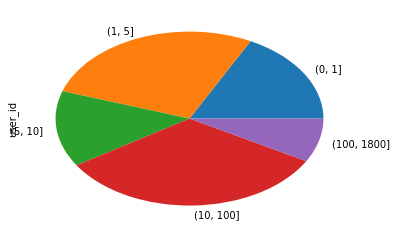

In [25]:
Freq_user_id_plot.groupby('interval')['user_id'].sum().plot(kind='pie')
Freq_user_id_plot.groupby('interval').sum()

# 看rating 高中低的 Freq dist

In [ ]:
def get_text_ready(text):
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    return lowercase_words


In [31]:

    
# df_text_ready = df_review.drop(labels=['date', 'user_id'], axis=1)['text'].apply()

grouped_review = df_review.drop(labels=['date', 'user_id'], axis=1).groupby('business_id')
grouped_rating = df_review.drop(labels=['date', 'user_id'], axis=1).groupby('stars')

review_text = ''.join(df_review['text'].iloc[100000:110000].astype(str))

In [37]:
grouped_rating_keys = grouped_rating.groups.keys()
grouped_rating_keys

dict_keys([1, 2, 3, 4, 5])

In [47]:
text_rating_dict = {}

for key in grouped_rating_keys:
    text_rating_dict[key] = ''.join(grouped_rating.get_group(key)['text'].iloc[:10000].astype(str))
    

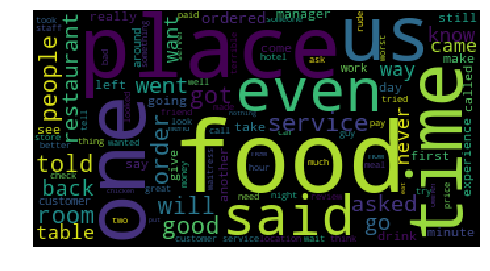

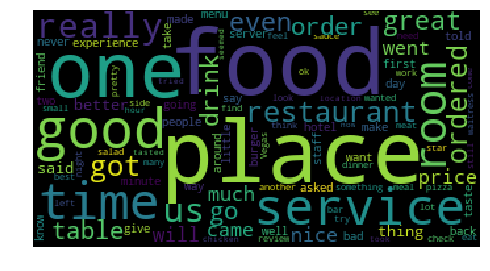

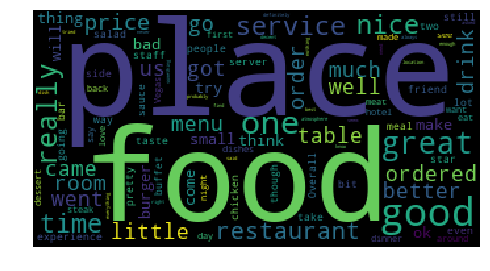

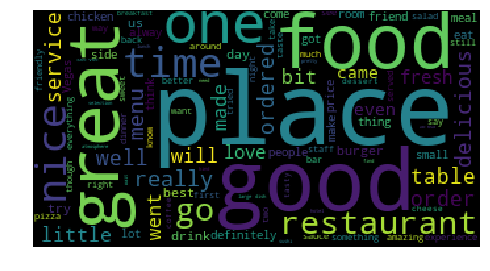

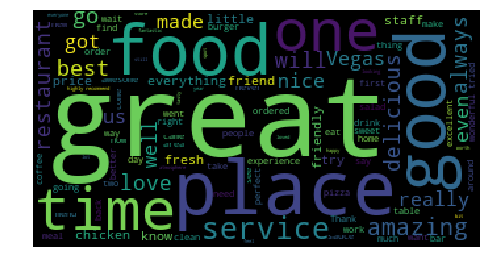

In [69]:
# word cloud
for i in range(1,6):
    fig_cloud_words = WordCloud(width=340,
                                height= 180,
                                max_words= 100).generate(text_rating_dict[i])

    plt.figure(figsize=(8, 6))
    plt.imshow(fig_cloud_words)
    plt.axis('off')
#     print(i)

(-0.5, 1439.5, 1079.5, -0.5)

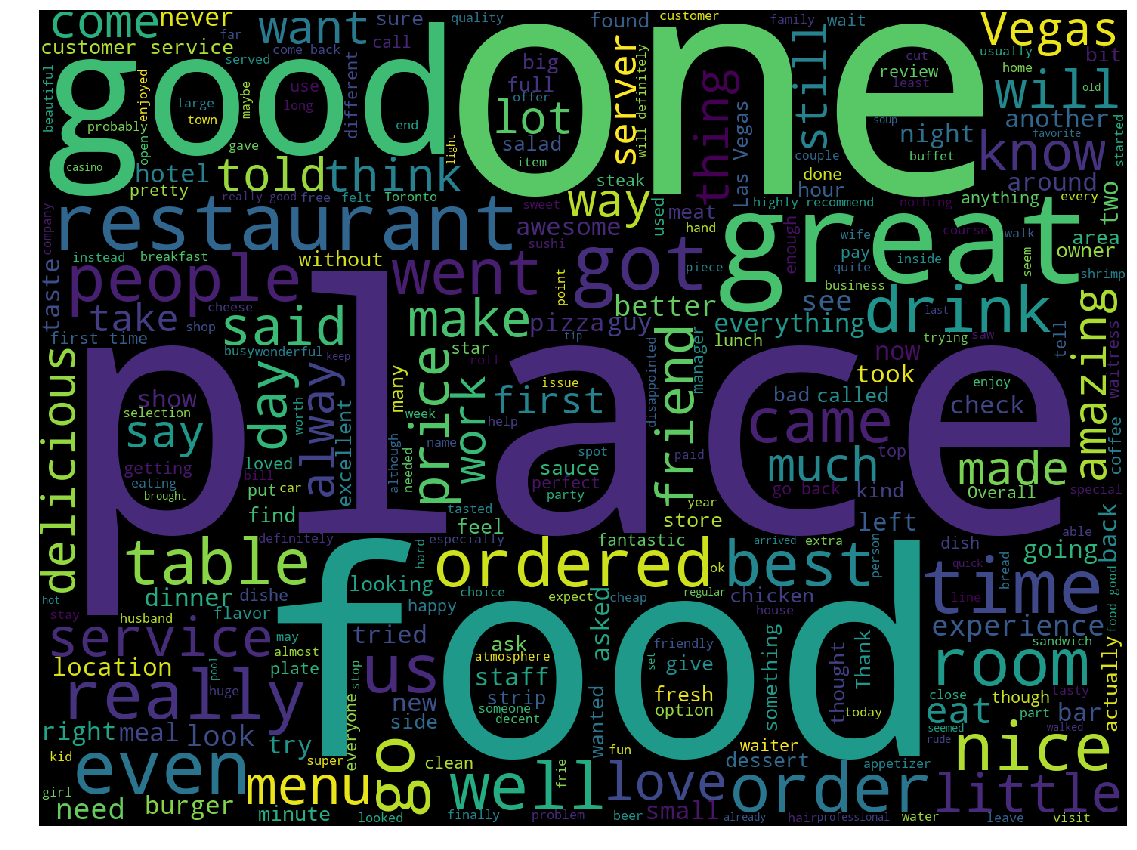

In [33]:
# Word cloud
fig_cloud_words = WordCloud(width=1440,
                            height= 1080,
                            max_words= 300).generate(review_text)

plt.figure(figsize=(20, 15))
plt.imshow(fig_cloud_words)
plt.axis('off')